In [1]:
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utils import *
from perceptron import perceptron
from linear_regression import linear_regression
from logistic import logistic
from svm import svm

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Perceptron

In [163]:
def run_perceptron(n_train = 10, noisy = None):
    print("n_train = ",n_train)
    n_rep = 1000  #  number of replicates
    n_test = 1000

    its = 0
    e_train = 0
    e_test = 0

    for i in range(n_rep):
        x, y, w_f = mkdata(n_train+n_test, noisy)
        x_train = x[:,:n_train]
        y_train = y[:,:n_train]
        x_test = x[:,n_train:]
        y_test = y[:,n_train:]

        w_g, it = perceptron(x_train, y_train)
        its += it

        x_test = add_bias(x_test)
        x_train = add_bias(x_train)

        e_train += np.where(y_train * (w_g.T @ x_train) < 0)[0].shape[0]/n_train
        e_test += np.where(y_test * (w_g.T @ x_test) < 0)[0].shape[0]/n_test

    print('E_train is %f, E_test is %f'%(e_train/n_rep, e_test/n_rep));
    print('Average number of iterations is %d.\n'%(its/n_rep));
    plotdata(x, y, w_f, w_g, 'Pecertron');

n_train =  10
E_train is 0.000000, E_test is 0.107675
Average number of iterations is 5.



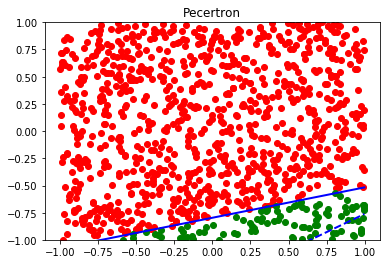

In [162]:
run_perceptron(10)

n_train =  100
E_train is 0.000000, E_test is 0.012832
Average number of iterations is 48.



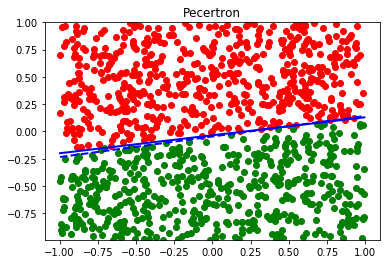

In [164]:
run_perceptron(100)

# Linear Regression

In [143]:
def run_linear_regression(n_train, noisy = None):
    print("n_train = ",n_train)
    n_rep = 1000  #  number of replicates
    n_test = 1000

    its = 0
    e_train = 0
    e_test = 0

    for i in range(n_rep):
        x, y, w_f = mkdata(n_train+n_test, noisy)
        x_train = x[:,:n_train]
        y_train = y[:,:n_train]
        x_test = x[:,n_train:]
        y_test = y[:,n_train:]

        w_g = linear_regression(x_train, y_train)

        x_test = add_bias(x_test)
        x_train = add_bias(x_train)

        e_train += np.where(y_train * (w_g.T @ x_train) < 0)[0].shape[0]/n_train
        e_test += np.where(y_test * (w_g.T @ x_test) < 0)[0].shape[0]/n_test

    print('E_train is %f, E_test is %f'%(e_train/n_rep, e_test/n_rep));
    noisy_txt = ": noisy" if noisy else ""
    plotdata(x, y, w_f, w_g, 'Linear Regression'+noisy_txt);

n_train =  100
E_train is 0.038030, E_test is 0.047265


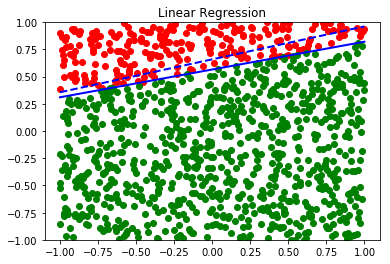

In [160]:
run_linear_regression(100)

n_train =  100
E_train is 0.132810, E_test is 0.144125


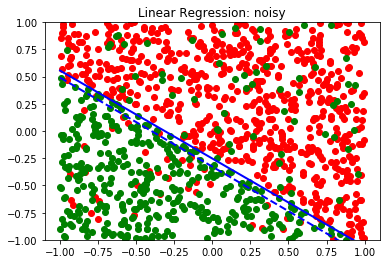

In [161]:
run_linear_regression(100,'noisy')

In [ ]:
train_data = scipy.io.loadmat('data/poly_train.mat')
test_data = scipy.io.loadmat('data/poly_test.mat')

x_train = train_data['X']
y_train = train_data['y']
x_test = test_data['X_test']
y_test = test_data['y_test']
w = linear_regression(x_train, y_train)

x_train = add_bias(x_train)
x_test = add_bias(x_test)
e_train = np.where(y_train * (w.T @ x_train) < 0)[0].shape[0]/len(y_train[0])
e_test = np.where(y_test * (w.T @ x_test) < 0)[0].shape[0]/len(y_test[0])

print('E_train is %f, E_test is %f.'%(e_train, e_test))

In [171]:
train_data = scipy.io.loadmat('data/poly_train.mat')
test_data = scipy.io.loadmat('data/poly_test.mat')

x_train = train_data['X']
y_train = train_data['y']
x_test = test_data['X_test']
y_test = test_data['y_test']

def poly_trans(x):
    ret = np.empty((5,x.shape[1]))
    ret[0] = x[0]
    ret[1] = x[1]
    ret[2] = x[0]*x[1]
    ret[3] = x[0]*x[0]
    ret[4] = x[1]*x[1]
    return ret

x_train_t = poly_trans(x_train)
x_test_t = poly_trans(x_test)

w = linear_regression(x_train_t, y_train)

x_train_t = add_bias(x_train_t)
x_test_t = add_bias(x_test_t)
e_train = np.where(y_train * (w.T @ x_train_t) < 0)[0].shape[0]/len(y_train[0])
e_test = np.where(y_test * (w.T @ x_test_t) < 0)[0].shape[0]/len(y_test[0])

print('E_train is %f, E_test is %f.'%(e_train, e_test))

E_train is 0.050000, E_test is 0.066000.


# Logistic Regression

In [223]:
def run_logistic_regression(n_train = 100, noisy = None):
    print("n_train = ",n_train)
    n_rep = 100  #  number of replicates
    n_test = 1000

    its = 0
    e_train = 0
    e_test = 0

    for i in range(n_rep):
        x, y, w_f = mkdata(n_train+n_test, noisy)
        x_train = x[:,:n_train]
        y_train = y[:,:n_train]
        x_test = x[:,n_train:]
        y_test = y[:,n_train:]

        w_g = logistic(x_train, y_train)

        x_test = add_bias(x_test)
        x_train = add_bias(x_train)

        e_train += np.where(y_train * (w_g.T @ x_train) < 0)[0].shape[0]/n_train
        e_test += np.where(y_test * (w_g.T @ x_test) < 0)[0].shape[0]/n_test

    print('E_train is %f, E_test is %f'%(e_train/n_rep, e_test/n_rep));
    noisy_txt = ": noisy" if noisy else ""
    plotdata(x, y, w_f, w_g, 'Logistic Regression'+noisy_txt)

n_train =  100
E_train is 0.006800, E_test is 0.014320


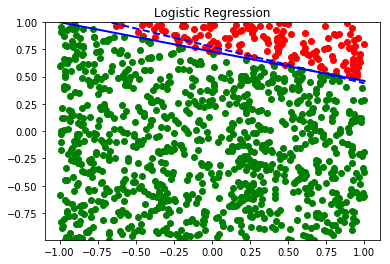

In [224]:
run_logistic_regression()

n_train =  100
E_train is 0.121400, E_test is 0.133980


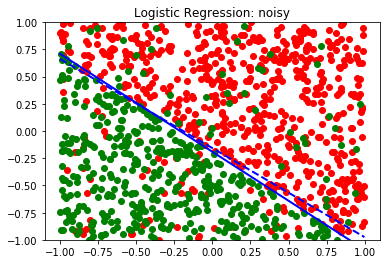

In [225]:
run_logistic_regression(noisy='noisy')

# Support Vector Machine

In [58]:
def run_svm(n_train = 100, noisy = None):
    print("n_train = ",n_train)
    n_rep = 100  #  number of replicates
    n_test = 100

    its = 0
    e_train = 0
    e_test = 0
    sn = 0

    for i in range(n_rep):
        x, y, w_f = mkdata(n_train+n_test, noisy)
        x_train = x[:,:n_train]
        y_train = y[:,:n_train]
        x_test = x[:,n_train:]
        y_test = y[:,n_train:]

        w_g, num = svm(x_train, y_train)
        sn+=num

        x_test = add_bias(x_test)
        x_train = add_bias(x_train)

        e_train += np.where(y_train * (w_g.T @ x_train) < 0)[0].shape[0]/n_train
        e_test += np.where(y_test * (w_g.T @ x_test) < 0)[0].shape[0]/n_test

    print('E_train is %f, E_test is %f'%(e_train/n_rep, e_test/n_rep))
    print('Number of Support Vectors:',sn/n_rep)
    noisy_txt = ": noisy" if noisy else ""
    plotdata(x_train[1:], y_train, w_f, w_g, 'SVM'+noisy_txt)

n_train =  30
E_train is 0.000000, E_test is 0.038300


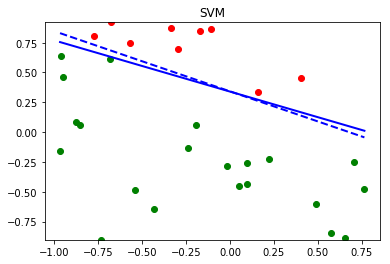

In [41]:
run_svm(30)

n_train =  100
E_train is 0.000000, E_test is 0.012000
Number of Support Vectors: 3.01


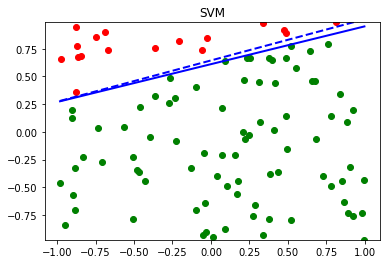

In [59]:
run_svm(100)